https://www.advancinganalytics.co.uk/blog/2022/6/13/10-incredibly-useful-clustering-algorithms-you-need-to-know

In [113]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import rand_score, adjusted_mutual_info_score, silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

digits = load_digits()
X = digits['data']
y = digits['target']

In [114]:
from umap import UMAP

In [115]:
rslt = pd.DataFrame(np.random.rand(18, 3), columns=['RI', 'AMI', 'Silhouette'])
indeces = ['KMeans', 'GaussianMixture', 'Agglomerative', 'Birch', 'DBSCAN', 'KMeans_PCAreduced', 'GaussianMixture_PCAreduced', 'Agglomerative_PCAreduced', 'Birch_PCAreduced', 'KMeans_TSNEreduced', 'GaussianMixture_TSNEreduced', 'Agglomerative_TSNEreduced', 'Birch_TSNEreduced', 'KMeans_UMAPreduced', 'GaussianMixture_UMAPreduced', 'Agglomerative_UMAPreduced', 'Birch_UMAPreduced', 'DBSCAN_UMAPreduced']
rslt['index'] = indeces
rslt.set_index('index', inplace=True)

In [116]:
model = KMeans(n_clusters=10, n_init='auto')
model.fit(X)
clusters = model.predict(X)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X, clusters)
rslt.loc['KMeans'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9164172408109036
AMI score: 0.7113292792219478
Silhouette score: 0.18669313196531048


In [117]:
result_kmeans = pd.DataFrame({'labels':y, 'clusters':clusters})
result_kmeans.loc[result_kmeans.labels==6].value_counts()

labels  clusters
6       3           177
        6             2
        5             1
        8             1
dtype: int64

In [118]:
model = GaussianMixture(n_components=10, covariance_type='tied') #‘full’, ‘tied’, ‘diag’, ‘spherical’
clusters = model.fit_predict(X)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X, clusters)
rslt.loc['GaussianMixture'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9465714324666327
AMI score: 0.7986755609253559
Silhouette score: 0.179259112140868


In [119]:
model = AgglomerativeClustering(distance_threshold=None, n_clusters=10)
clusters = model.fit_predict(X)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X, clusters)
rslt.loc['Agglomerative'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9612333349445314
AMI score: 0.866832148975032
Silhouette score: 0.17849659940596496


In [120]:
model = Birch(n_clusters=10)
clusters = model.fit_predict(X)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X, clusters)
rslt.loc['Birch'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9612333349445314
AMI score: 0.866832148975032
Silhouette score: 0.17849659940596496


In [121]:
model = DBSCAN(eps=23.5, min_samples=16)
clusters = model.fit_predict(X)
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [122]:
result_dbscan = pd.DataFrame({'labels':y, 'clusters':clusters})
result_dbscan.loc[result_kmeans.labels==6].value_counts()

labels  clusters
6        3          176
        -1            4
         1            1
dtype: int64

In [123]:
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X, clusters)
rslt.loc['DBSCAN'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9071224869957725
AMI score: 0.7333601973771944
Silhouette score: 0.1439507896248093


DBSCAN, як і інші density-based алгоритми, не пасує для цієї задачі, бо у нас є чітка кількість кластерів і вони не "вкладені" один в одного. Їх набагато легше розділити за допомогою KMeans. 

<AxesSubplot: >

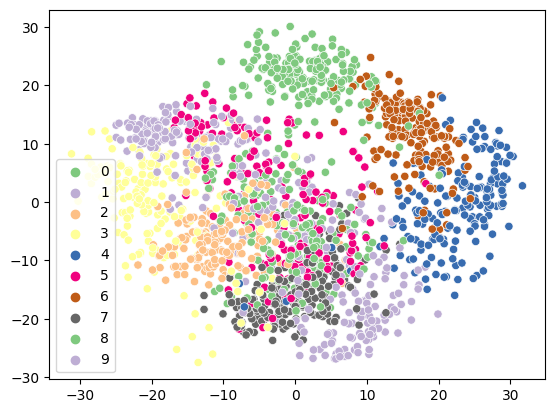

In [124]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
sns.scatterplot(X_reduced, x=X_reduced[:,0], y=X_reduced[:,1], hue=y, palette='Accent')

In [125]:
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)

In [131]:
model = KMeans(n_clusters=10, n_init='auto')
model.fit(X_reduced)
clusters = model.predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['KMeans_PCAreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9412557182039355
AMI score: 0.7384050957559868
Silhouette score: 0.25340142022265616


In [132]:
result_kmeans = pd.DataFrame({'labels':y, 'clusters':clusters})
result_kmeans.loc[result_kmeans.labels==6].value_counts()

labels  clusters
6       6           175
        7             4
        3             1
        8             1
dtype: int64

In [133]:
model = GaussianMixture(n_components=10, covariance_type='tied') #‘full’, ‘tied’, ‘diag’, ‘spherical’
clusters = model.fit_predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['GaussianMixture_PCAreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9391363730444083
AMI score: 0.7491512294997675
Silhouette score: 0.25973113998957625


In [134]:
model = AgglomerativeClustering(distance_threshold=None, n_clusters=10)
clusters = model.fit_predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['Agglomerative_PCAreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9455718699688791
AMI score: 0.7954907063639328
Silhouette score: 0.25034192047065335


In [135]:
model = Birch(n_clusters=10)
clusters = model.fit_predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['Birch_PCAreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9455718699688791
AMI score: 0.7954907063639328
Silhouette score: 0.25034192047065335


In [136]:
from sklearn.manifold import TSNE

In [137]:
tsne = TSNE(n_components=2,
           perplexity = 30)
X_reduced = tsne.fit_transform(X)

<AxesSubplot: >

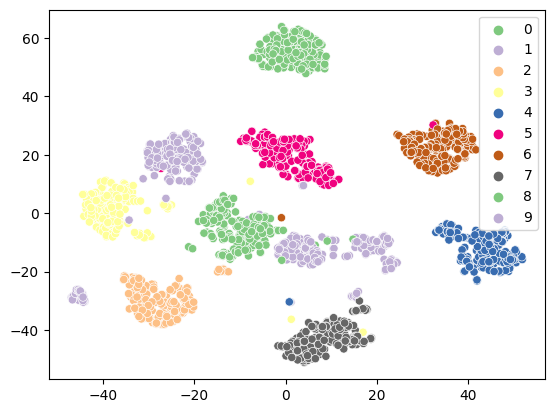

In [138]:
sns.scatterplot(X_reduced, x=X_reduced[:,0], y=X_reduced[:,1], hue=y, palette='Accent')

In [139]:
tsne = TSNE(n_components=2,
           perplexity = 30)
X_reduced = tsne.fit_transform(X)

In [141]:
model = KMeans(n_clusters=10, n_init='auto')
model.fit(X_reduced)
clusters = model.predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['Kmeans_TSNEreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9788914461494225
AMI score: 0.9073535708641318
Silhouette score: 0.6402942


In [142]:
result_kmeans = pd.DataFrame({'labels':y, 'clusters':clusters})
result_kmeans.loc[result_kmeans.labels==3].value_counts()

labels  clusters
3       8           179
        7             2
        9             2
dtype: int64

In [143]:
model = GaussianMixture(n_components=10, covariance_type='tied') #‘full’, ‘tied’, ‘diag’, ‘spherical’
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['GaussianMixture_TSNEreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9788914461494225
AMI score: 0.9073535708641318
Silhouette score: 0.6402942


In [144]:
model = AgglomerativeClustering(distance_threshold=None, n_clusters=10)
clusters = model.fit_predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['Agglomerative_TSNEreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9820785198790858
AMI score: 0.9201675099394233
Silhouette score: 0.64310795


In [145]:
model = Birch(n_clusters=10)
clusters = model.fit_predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['Birch_TSNEreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9820785198790858
AMI score: 0.9201675099394233
Silhouette score: 0.64310795


<AxesSubplot: >

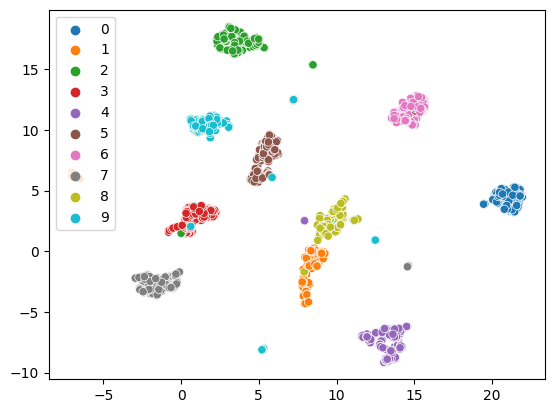

In [146]:
umap = UMAP(n_neighbors=5,
           n_components=2)
X_reduced = umap.fit_transform(X)
sns.scatterplot(X_reduced, x=X_reduced[:,0], y=X_reduced[:,1], hue=y, palette='tab10')

<AxesSubplot: >

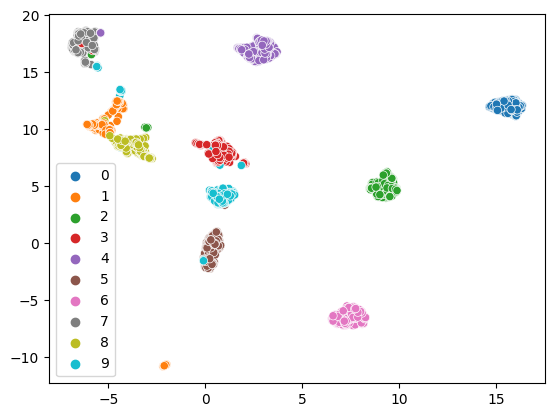

In [147]:
umap = UMAP(n_neighbors=15,
           n_components=2)
X_reduced = umap.fit_transform(X)
sns.scatterplot(X_reduced, x=X_reduced[:,0], y=X_reduced[:,1], hue=y, palette='tab10')

In [158]:
umap = UMAP(n_neighbors=15,
           n_components=3)
X_reduced = umap.fit_transform(X)

In [155]:
model = KMeans(n_clusters=10, n_init='auto')
model.fit(X_reduced)
clusters = model.predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['KMeans_UMAPreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.982090913710428
AMI score: 0.9215717073078237
Silhouette score: 0.76620364


In [156]:
result_kmeans = pd.DataFrame({'labels':y, 'clusters':clusters})
result_kmeans.loc[result_kmeans.labels==3].value_counts()

labels  clusters
3       0           182
        7             1
dtype: int64

In [157]:
model = GaussianMixture(n_components=10, covariance_type='tied') #‘full’, ‘tied’, ‘diag’, ‘spherical’
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['GaussianMixture_UMAPreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.982090913710428
AMI score: 0.9215717073078237
Silhouette score: 0.76620364


In [166]:
model = AgglomerativeClustering(distance_threshold=None, n_clusters=10)
clusters = model.fit_predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['Agglomerative_UMAPreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9651212798365997
AMI score: 0.9020145387782398
Silhouette score: 0.7947459


In [167]:
model = Birch(n_clusters=10)
clusters = model.fit_predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['Birch_UMAPreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9651212798365997
AMI score: 0.9020145387782399
Silhouette score: 0.7947459


In [108]:
model = DBSCAN(eps=1.5, min_samples=20)
clusters = model.fit_predict(X_reduced)
np.unique(clusters)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [168]:
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['DBSCAN_UMAPreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9651212798365997
AMI score: 0.9020145387782399
Silhouette score: 0.7947459


<AxesSubplot: >

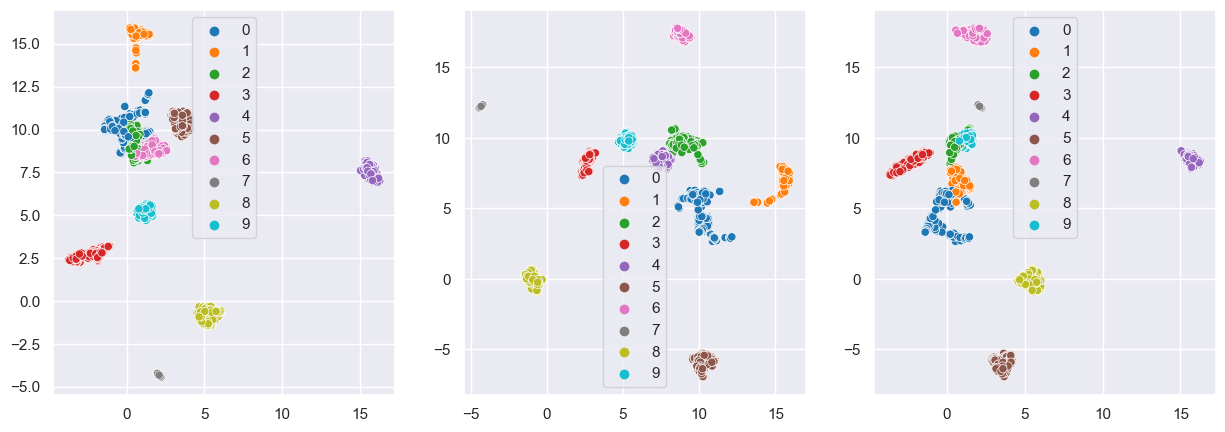

In [180]:
fig, axs = plt.subplots(ncols=3)
sns.set(rc={'figure.figsize':(7,15)})
sns.scatterplot(X_reduced, x=X_reduced[:,0], y=X_reduced[:,1], hue=clusters, palette='tab10', ax=axs[0])
sns.scatterplot(X_reduced, x=X_reduced[:,1], y=X_reduced[:,2], hue=clusters, palette='tab10', ax=axs[1])
sns.scatterplot(X_reduced, x=X_reduced[:,0], y=X_reduced[:,2], hue=clusters, palette='tab10', ax=axs[2])

In [181]:
rslt.sort_values('RI', ascending=False)

,RI,AMI,Silhouette
index,,,
KMeans_UMAPreduced,0.982091,0.921572,0.766204
GaussianMixture_UMAPreduced,0.982091,0.921572,0.766204
Agglomerative_TSNEreduced,0.982079,0.920168,0.643108
Birch_TSNEreduced,0.982079,0.920168,0.643108
Kmeans_TSNEreduced,0.978891,0.907354,0.640294
GaussianMixture_TSNEreduced,0.978891,0.907354,0.640294
Birch_UMAPreduced,0.965121,0.902015,0.794746
DBSCAN_UMAPreduced,0.965121,0.902015,0.794746
Agglomerative_UMAPreduced,0.965121,0.902015,0.794746


UMAP gives the highest silhouette value due to it's ability to create vast distances between different clusters and concentrate points of one cluster. Dimentionality reduction significantly improves scores/consistency of clusters (except for PCA)